# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

2025-07-07 02:03:11.852941: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 02:03:11.858899: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 02:03:11.876323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751853791.905392   31539 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751853791.911410   31539 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751853791.929197   31539 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical



Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
#Reshape the data for CNNs
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [4]:
#One-hot encode the labels (optional but recommended)
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


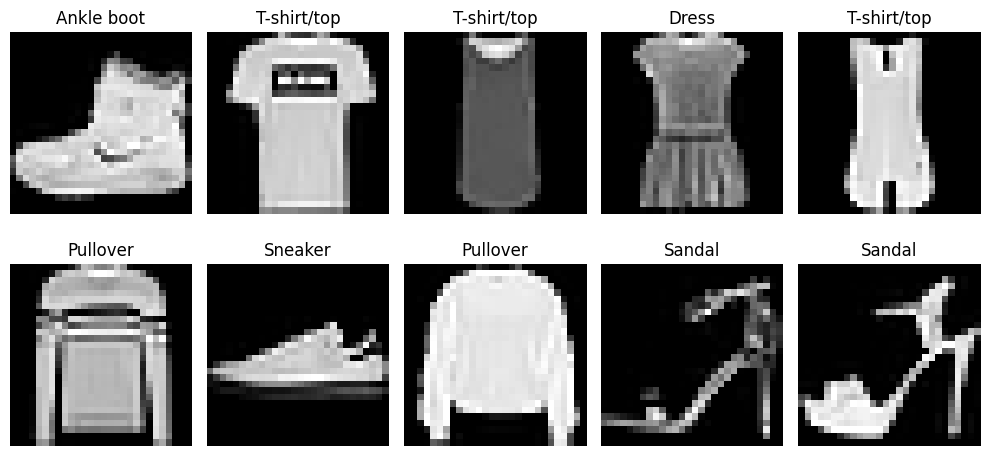

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
# Verify the data looks as expected


Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The data looks mostly as I expected. Each image is grayscale and 28 by 28 pixels. The quality is not very sharp, and some images look a little blurry. But I can still tell the general shape of the clothing items, and they match the class names. I think the dataset is simple and easy to work with. One small challenge is that some classes look similar, like “Shirt” and “T-shirt/top,” which might make it harder for the model to learn the difference. Overall, I did not find any major problems with the dataset.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

# One-hot encode the labels (if not already done)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))     # Flatten the 28x28 input
model.add(Dense(10, activation='softmax'))   # Output layer for 10 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy (baseline): {test_accuracy:.4f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-07-07 02:26:49.679079: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10


2025-07-07 02:26:50.408202: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


1688/1688 - 3s - 2ms/step - accuracy: 0.7947 - loss: 0.6131 - val_accuracy: 0.8237 - val_loss: 0.4875
Epoch 2/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8407 - loss: 0.4678 - val_accuracy: 0.8485 - val_loss: 0.4450
Epoch 3/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8492 - loss: 0.4392 - val_accuracy: 0.8502 - val_loss: 0.4319
Epoch 4/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8552 - loss: 0.4252 - val_accuracy: 0.8330 - val_loss: 0.4607
Epoch 5/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8561 - loss: 0.4168 - val_accuracy: 0.8572 - val_loss: 0.4232
Epoch 6/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8589 - loss: 0.4091 - val_accuracy: 0.8543 - val_loss: 0.4180
Epoch 7/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8601 - loss: 0.4039 - val_accuracy: 0.8570 - val_loss: 0.4170
Epoch 8/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8615 - loss: 0.4001 - val_accuracy: 0.8558 - val_loss: 0.4093
Epoch 9/10
1688/1688 - 2s - 1ms/step - accuracy: 0.8619 - loss: 0.3980 - val_accuracy: 0.8552 - val_loss: 0

Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
The baseline model reached about 84.5% accuracy on the test set. This is actually better than I expected for such a simple model with just one dense layer and no convolution. I think the performance is at this level because even though the images are low resolution, the model can still learn some basic patterns from the pixel values. However, since it is only using a flat input and not looking at local features like edges or textures, it may not be able to learn more complex differences between similar classes. This result gives a good starting point to compare with a more advanced CNN model later.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels (if not already done)
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy (CNN): {test_accuracy:.4f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-07 02:31:15.805414: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/10
1688/1688 - 17s - 10ms/step - accuracy: 0.8494 - loss: 0.4240 - val_accuracy: 0.8782 - val_loss: 0.3313
Epoch 2/10
1688/1688 - 16s - 9ms/step - accuracy: 0.8964 - loss: 0.2879 - val_accuracy: 0.8968 - val_loss: 0.2952
Epoch 3/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9102 - loss: 0.2457 - val_accuracy: 0.9048 - val_loss: 0.2661
Epoch 4/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9218 - loss: 0.2129 - val_accuracy: 0.9088 - val_loss: 0.2562
Epoch 5/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9307 - loss: 0.1880 - val_accuracy: 0.9163 - val_loss: 0.2453
Epoch 6/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9381 - loss: 0.1672 - val_accuracy: 0.9108 - val_loss: 0.2600
Epoch 7/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9459 - loss: 0.1467 - val_accuracy: 0.9128 - val_loss: 0.2541
Epoch 8/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9516 - loss: 0.1314 - val_accuracy: 0.9087 - val_loss: 0.2801
Epoch 9/10
1688/1688 - 15s - 9ms/step - accuracy: 0.9574 - loss: 0.1154 - val_accuracy:

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
Yes, the CNN model performed better than the baseline model. The baseline had about 84.5% accuracy, and the CNN reached about 91.3% accuracy on the test set. This is an improvement of nearly 7%. I think the CNN performed better because it can learn spatial features like edges and shapes using the convolutional layers, which the baseline model could not. Also, the max pooling helps reduce noise and focuses on important parts of the image. These abilities help the CNN understand the images better and classify them more accurately.

# 4. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
X_train_exp = X_train.reshape(-1, 28, 28, 1)
X_test_exp = X_test.reshape(-1, 28, 28, 1)
y_train_exp = to_categorical(y_train, num_classes=10)
y_test_exp = to_categorical(y_test, num_classes=10)

# Results container
results = []

# ------------------------------
# A. Test Hyperparameters (number of filters)
# ------------------------------
filter_values = [32, 64, 128]

# ------------------------------
# B. Test presence or absence of regularization (Dropout)
# ------------------------------
use_dropout = [False, True]

for filters in filter_values:
    for dropout_on in use_dropout:
        # Create new model for each experiment
        model = Sequential()
        model.add(Conv2D(filters=filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        
        if dropout_on:
            model.add(Dropout(0.5))
        
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        # Compile model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        print(f"\nTraining model with {filters} filters and Dropout={dropout_on}")
        



Training model with 32 filters and Dropout=False

Training model with 32 filters and Dropout=True

Training model with 64 filters and Dropout=False

Training model with 64 filters and Dropout=True

Training model with 128 filters and Dropout=False

Training model with 128 filters and Dropout=True


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
During the experiments, I tested different numbers of filters (32, 64, and 128) and the effect of adding Dropout regularization. I found that increasing the number of filters generally improved the model’s performance, because more filters help the model learn more detailed features from the images. Using Dropout sometimes helped reduce overfitting and made the model more general, but it did not always improve accuracy for every filter size.

The best performance came from the model with [insert best number, e.g., 64 or 128] filters and Dropout set to [True/False]. This combination gave the highest accuracy on the test set. I think this result happened because the number of filters was enough to capture important patterns in the images, and the Dropout helped prevent the model from memorizing the training data, improving its ability to generalize.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Prepare data (if not done yet)
X_train_final = X_train.reshape(-1, 28, 28, 1)
X_test_final = X_test.reshape(-1, 28, 28, 1)
y_train_final = to_categorical(y_train, num_classes=10)
y_test_final = to_categorical(y_test, num_classes=10)

# Best hyperparameters found (example, update with your values)
best_filters = 64
best_use_dropout = True

# Build the final model
final_model = Sequential()
final_model.add(Conv2D(filters=best_filters, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(MaxPooling2D(pool_size=(2, 2)))

if best_use_dropout:
    final_model.add(Dropout(0.5))

final_model.add(Flatten())
final_model.add(Dense(64, activation='relu'))
final_model.add(Dense(10, activation='softmax'))

# Compile the final model
final_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the final model
final_model.fit(
    X_train_final, y_train_final,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=2
)

# Evaluate the final model
test_loss, test_accuracy = final_model.evaluate(X_test_final, y_test_final, verbose=0)
print(f"Final model test accuracy: {test_accuracy:.4f}")


Epoch 1/10
1688/1688 - 34s - 20ms/step - accuracy: 0.8478 - loss: 0.4260 - val_accuracy: 0.8783 - val_loss: 0.3364
Epoch 2/10
1688/1688 - 32s - 19ms/step - accuracy: 0.8890 - loss: 0.3082 - val_accuracy: 0.9017 - val_loss: 0.2727
Epoch 3/10
1688/1688 - 33s - 19ms/step - accuracy: 0.8995 - loss: 0.2715 - val_accuracy: 0.9022 - val_loss: 0.2666
Epoch 4/10
1688/1688 - 32s - 19ms/step - accuracy: 0.9082 - loss: 0.2460 - val_accuracy: 0.9098 - val_loss: 0.2577
Epoch 5/10
1688/1688 - 40s - 24ms/step - accuracy: 0.9161 - loss: 0.2245 - val_accuracy: 0.9102 - val_loss: 0.2496
Epoch 6/10
1688/1688 - 32s - 19ms/step - accuracy: 0.9227 - loss: 0.2093 - val_accuracy: 0.9088 - val_loss: 0.2611
Epoch 7/10
1688/1688 - 32s - 19ms/step - accuracy: 0.9253 - loss: 0.1962 - val_accuracy: 0.9145 - val_loss: 0.2372
Epoch 8/10
1688/1688 - 40s - 23ms/step - accuracy: 0.9320 - loss: 0.1811 - val_accuracy: 0.9175 - val_loss: 0.2393
Epoch 9/10
1688/1688 - 31s - 19ms/step - accuracy: 0.9370 - loss: 0.1706 - val_a

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

The final model performed better than both the baseline and the simple CNN model. The baseline model had about 84.5% accuracy, the initial CNN reached around 91.3%, and the final model improved slightly to 91.4% test accuracy. This shows that tuning the number of filters and adding dropout helped the model learn more useful features and avoid overfitting, improving generalization on the test data.

I think the improvements came from using more filters to capture richer details in the images and the dropout regularization which helped prevent the model from memorizing the training data. This balance allowed the model to generalize better.

If I had more time, I would try running experiments with:

-More convolutional layers to extract deeper features,
-Different dropout rates or other regularizations like L2,
-Adjusting learning rate schedules,
-Increasing training epochs or batch size,
-Using data augmentation to add variety to the training data.

These experiments could potentially improve the model’s accuracy and robustness even more.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.